# Environment

### Libraries and environment variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nbconvert

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option("display.max_columns", None)
# formatter
%reload_ext nb_black

# set figure size globally
# plt.rcParams["figure.figsize"] = (10, 13)
plt.rcParams.update({"font.size": 18})

<IPython.core.display.Javascript object>

### Set working directory

In [2]:
import os
from pathlib import Path

# get absolute path of this script and create Path object
path = Path(os.getcwd())

# use Path object to get path of project folder
absolutePath = path.parent.absolute()

# change working directory to project folder
os.chdir(absolutePath)

# get path of project folder
path_projectFolder = os.getcwd()

<IPython.core.display.Javascript object>

### Load Data

In [3]:
test1 = pd.read_csv(path_projectFolder + "/data/test_1.csv")
test2 = pd.read_csv(path_projectFolder + "/data/test_2.csv")
test3 = pd.read_csv(path_projectFolder + "/data/test_3.csv")
test4 = pd.read_csv(path_projectFolder + "/data/test_4.csv")

<IPython.core.display.Javascript object>

In [4]:
# Drop all empty columns from tests
listTests = [test1, test2, test3, test4]

for t in listTests:
    t.dropna(how="all", axis=1, inplace=True)

test1.head()

,Unnamed: 0,Test,Stufe,unique_id,Level,Gesamt_Level,1,2,3,4,5,6,7,8,9,10
0,0,1,1,404_0,C,C,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1,1,404_1,A,A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,1,1,404_10,B,B,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,3,1,1,404_11,A,A,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4,1,1,404_12,B,C,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


<IPython.core.display.Javascript object>

# EDA

### Items per test

In [5]:
print(
    "\n",
    "Subtest 1 item count: 10",
    "\n",
    "Subtest 2 item count: 10",
    "\n",
    "Subtest 3 item count: 50",
    "\n",
    "Subtest 4 item count: 30 ",
    "\n",
)


 Subtest 1 item count: 10 
 Subtest 2 item count: 10 
 Subtest 3 item count: 50 
 Subtest 4 item count: 30  



<IPython.core.display.Javascript object>

### Children

In [6]:
anzahl1 = len(test1)
anzahl2 = len(test2)
anzahl3 = len(test3)
anzahl4 = len(test4)
print(
    "\n",
    "Subtest 1 Kinder:",
    anzahl1,
    "\n",
    "Subtest 2 Kinder:",
    anzahl2,
    "\n",
    "Subtest 3 Kinder:",
    anzahl3,
    "\n",
    "Subtest 4 Kinder:",
    anzahl4,
    "\n",
)


 Subtest 1 Kinder: 51 
 Subtest 2 Kinder: 52 
 Subtest 3 Kinder: 51 
 Subtest 4 Kinder: 46 



<IPython.core.display.Javascript object>

### 1. Final level

In [7]:
# stacked barchart for level
def level_stacked(df, title, column):
    dataToPlott = df[column].value_counts(normalize=True) * 100

    dataToPlott2 = pd.DataFrame(dataToPlott)

    dataToPlott2["level"] = dataToPlott2.index

    dataToPlott2 = dataToPlott2.transpose()

    dataToPlott2 = dataToPlott2.head(-1)

    dataToPlott2 = dataToPlott2[["A", "B", "C"]]
    print(dataToPlott2)

    
    dataToPlott2.plot(kind="barh", stacked=True, color=co)

    plt.legend(["level A", "level B", "level C"], bbox_to_anchor=(1.0, 1))

    plt.xlabel("%")

    plt.xticks([0, 10, 20, 30, 40, 50, 50, 60, 70, 80, 90, 100])
    plt.title(title)


# histogram for subtest level
def level_histogram(df, title, colors, figurename):
    dataToPlott = df["subtest_result"].value_counts(normalize=True) * 100
    dataToPlott2 = pd.DataFrame(dataToPlott)
    dataToPlott_sorted = dataToPlott2.sort_values("subtest_result")
    dataToPlott_sorted
    dataToPlott_sorted["subtest_result"].plot(kind="barh", color=co)
    plt.title(title)


# colors for bars
co = [
    "lightsteelblue",
    "cornflowerblue",
    "royalblue",
]


<IPython.core.display.Javascript object>

nur Kinder, die auch Test 4 gemacht haben:

                     A          B          C
Gesamt_Level  2.173913  34.782609  63.043478


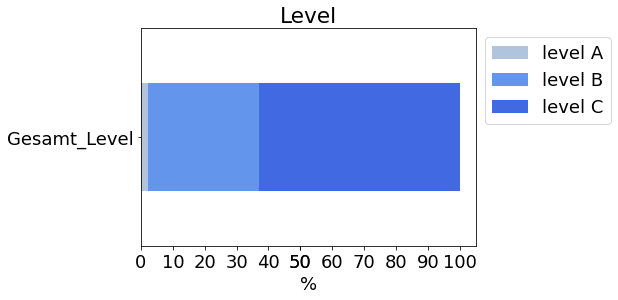

<IPython.core.display.Javascript object>

In [8]:
level_stacked(test4, "Level", "Gesamt_Level")

inklusive Kindern, die Test 4 nicht gemacht haben:

                     A          B          C
Gesamt_Level  9.803922  31.372549  56.862745


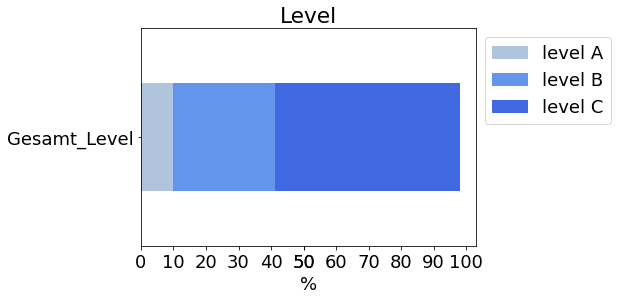

<IPython.core.display.Javascript object>

In [9]:
level_stacked(test3, "Level", "Gesamt_Level")

### 2. Subtest level

#### Subtest 1 Level

               A          B          C
Level  17.647059  25.490196  56.862745


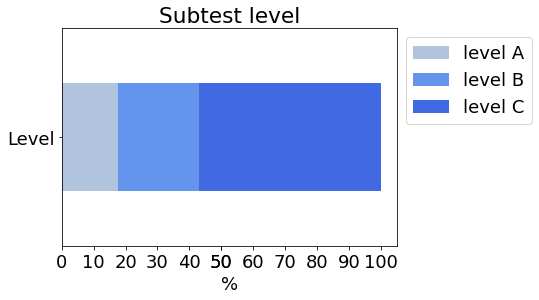

<IPython.core.display.Javascript object>

In [10]:
level_stacked(test1, "Subtest level", "Level")

#### Subtest 2 Level

               A     B          C
Level  17.307692  25.0  55.769231


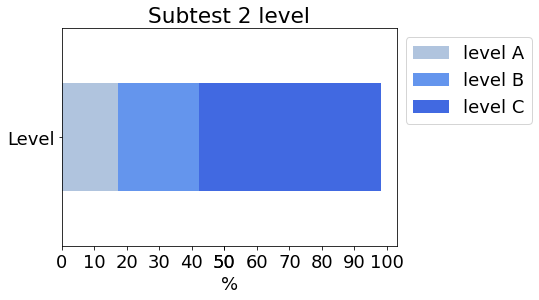

<IPython.core.display.Javascript object>

In [11]:
level_stacked(test2, "Subtest 2 level", "Level")

#### Subtest 3 Level

              A          B          C
Level  9.803922  25.490196  64.705882


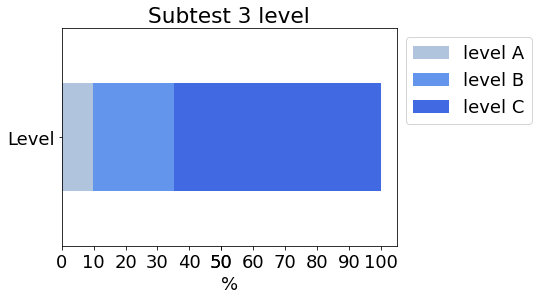

<IPython.core.display.Javascript object>

In [12]:
level_stacked(test3, "Subtest 3 level", "Level")

#### Subtest 4 Level

               A          B          C
Level  13.043478  26.086957  60.869565


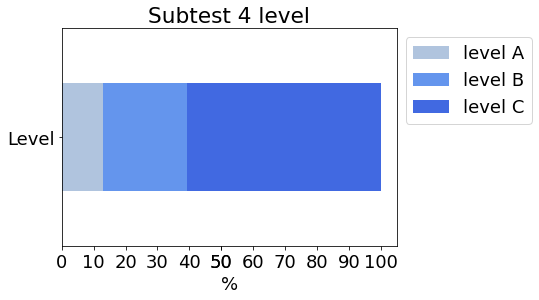

<IPython.core.display.Javascript object>

In [13]:
level_stacked(test4, "Subtest 4 level", "Level")

### 4. Item Difficulty --> Results of Subtest Items

#### Participation/Motivation

In [14]:
def missing_values_per_variable(df, percent=100, dropCol=False):  # sum_missing_values

    ergebnis = df[
        df.columns.difference(
            [
                "Unnamed: 0",
                "Test",
                "Stufe",
                "unique_id",
                "Level",
                "Gesamt_Level",
                "Gesamt_Richtig",
            ]
        )
    ].columns

    # ergebnis = [col for col in df.columns if "ergebnis" in col]
    selectedData = df[ergebnis]
    selectedData.replace(99, np.NaN, inplace=True)
    listCol = []
    rowCount = selectedData.shape[0]
    for column in selectedData:
        sumColumn = selectedData[column].isna().sum()
        percentNA = sumColumn / rowCount * 100
        if percentNA <= percent:
            listCol.append(
                {
                    "column": column,
                    "missing_values": sumColumn,
                    "missing_values(%)": percentNA,
                }
            )
        else:
            if dropCol == True:
                print("Column dropped: ", column, ", missing values(%): ", percentNA)
                selectedData.drop([column], axis=1, inplace=True)
    listCol = (
        pd.DataFrame(listCol)
        .sort_values(by="missing_values", ascending=False)
        .reset_index(drop=True)
    )

    listCol.index = listCol["column"]
    listCol.drop("column", axis=1, inplace=True)

    return listCol

<IPython.core.display.Javascript object>

#### Subtest 1: Missing values

In [15]:
missing_values = missing_values_per_variable(test1)
print("Kinder:", anzahl1)
missing_values.head()

Kinder: 51


,missing_values,missing_values(%)
column,,
10,5,9.803922
4,4,7.843137
9,2,3.921569
3,1,1.960784
5,1,1.960784


<IPython.core.display.Javascript object>

#### Subtest 2: Missing values

In [16]:
missing_values = missing_values_per_variable(test2)
print("Kinder:", anzahl2)
missing_values.head()

Kinder: 52


,missing_values,missing_values(%)
column,,
10,12,23.076923
8,6,11.538462
2,5,9.615385
9,5,9.615385
7,4,7.692308


<IPython.core.display.Javascript object>

#### Subtest 3: Missing values

In [17]:
missing_values = missing_values_per_variable(test3)
print("Kinder:", anzahl3)
missing_values.head(+10)

Kinder: 51


,missing_values,missing_values(%)
column,,
50,32,62.745098
48,31,60.784314
49,30,58.823529
47,29,56.862745
46,29,56.862745
43,27,52.941176
45,27,52.941176
44,27,52.941176
42,26,50.980392


<IPython.core.display.Javascript object>

#### Subtest 4: Missing values

In [18]:
missing_values = missing_values_per_variable(test4)
print("Kinder:", anzahl4)
missing_values.head(+10)

Kinder: 46


,missing_values,missing_values(%)
column,,
29,35,76.086957
30,34,73.913043
28,34,73.913043
27,32,69.565217
26,30,65.217391
25,29,63.043478
21,25,54.347826
24,25,54.347826
20,24,52.173913


<IPython.core.display.Javascript object>

In [19]:
def getFrequencies(df):

    """Aim : To plot data, calculate frequencies of column values
    Result : DF with frequencies and df with freqencies in percentages"""

    ergebnis = test_results = df[
        df.columns.difference(
            [
                "Unnamed: 0",
                "Test",
                "Stufe",
                "unique_id",
                "Level",
                "Gesamt_Level",
                "Gesamt_Richtig",
            ]
        )
    ].columns
    ergebnis = [int(x) for x in ergebnis]
    ergebnis.sort()
    ergebnis = [str(x) for x in ergebnis]
    # ergebnis = [col for col in df.columns if "ergebnis" in col]
    selectedData = df[ergebnis]
    frequencies = {}
    for value in selectedData.columns:
        frequencies[value] = selectedData[value].value_counts()
    data = pd.DataFrame(frequencies)
    dataToPlot = data.transpose()
    dataToPlot_percentages = dataToPlot.div(dataToPlot.sum(axis=1), axis=0) * 100
    dataToPlot_percentages = dataToPlot_percentages[[1, 0, 99]]
    return dataToPlot_percentages, dataToPlot


def plotFrequencies(df, width, height, title, legend, ylabel, xlabel, color):

    """Aim : To plot data, calculate frequencies of column values
    Result : DF with frequencies and df with freqencies in percentages"""

    df.plot(figsize=(width, height), kind="bar", stacked=True, color=colors, width=0.7)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.axhline(y=85, color="black", linestyle="--")
    plt.legend(legend, bbox_to_anchor=(1, 1), borderpad=0.5)
    plt.yticks([0, 10, 20, 30, 40, 50, 50, 60, 70, 80, 90, 100])
    # plt.hlines(85, -1, 10, colors="black", linestyles="--", label="kjahsdk")
    plt.show()


colors = ["g", "r", "b"]
legend = [
    "85% richtig - optimaler Schwierigkeitsgrad",
    "richtig",
    "falsch",
    "unbeantwortet",
]

<IPython.core.display.Javascript object>

#### Subtest 1 : Item results

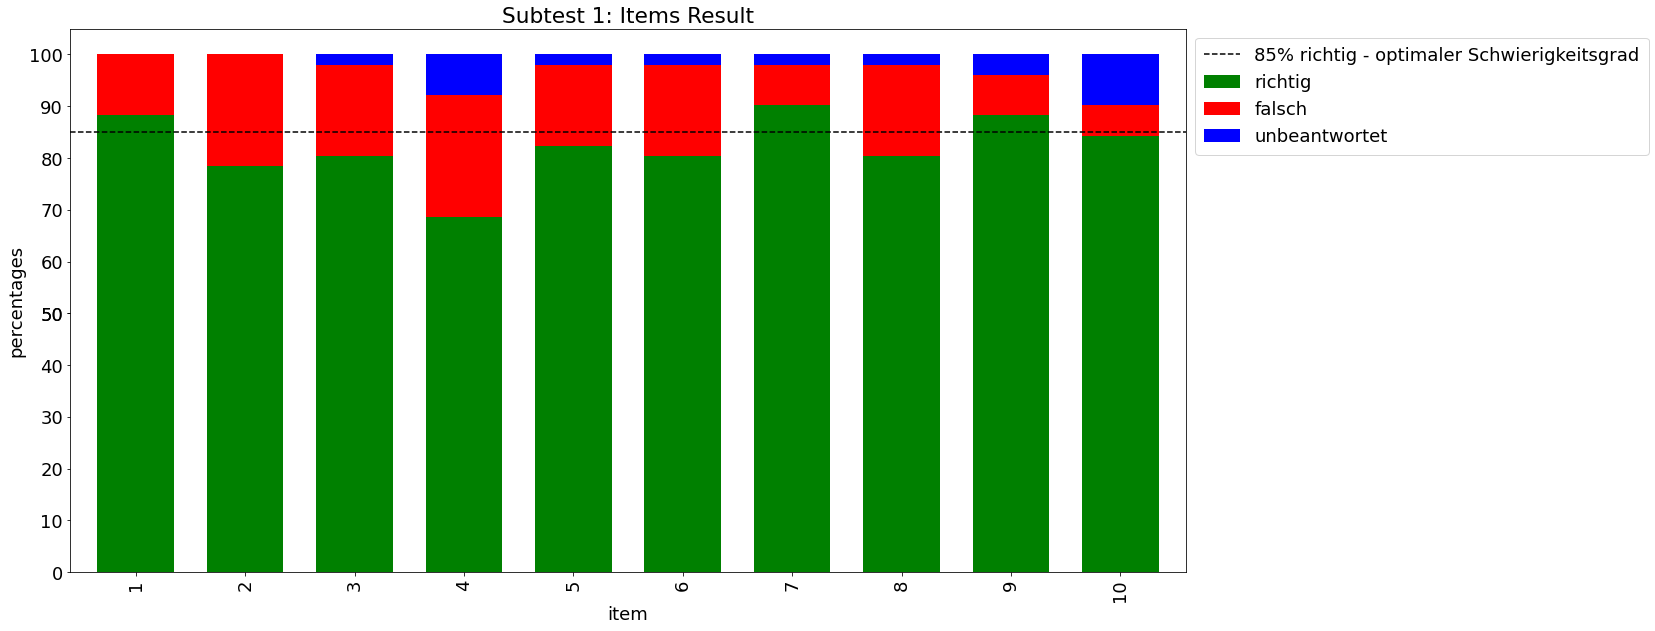

<IPython.core.display.Javascript object>

In [20]:
test1_frequencies_percentages = getFrequencies(test1)[0]
plotFrequencies(
    test1_frequencies_percentages,
    20,
    10,
    "Subtest 1: Items Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

#### Subtest 2: Item results

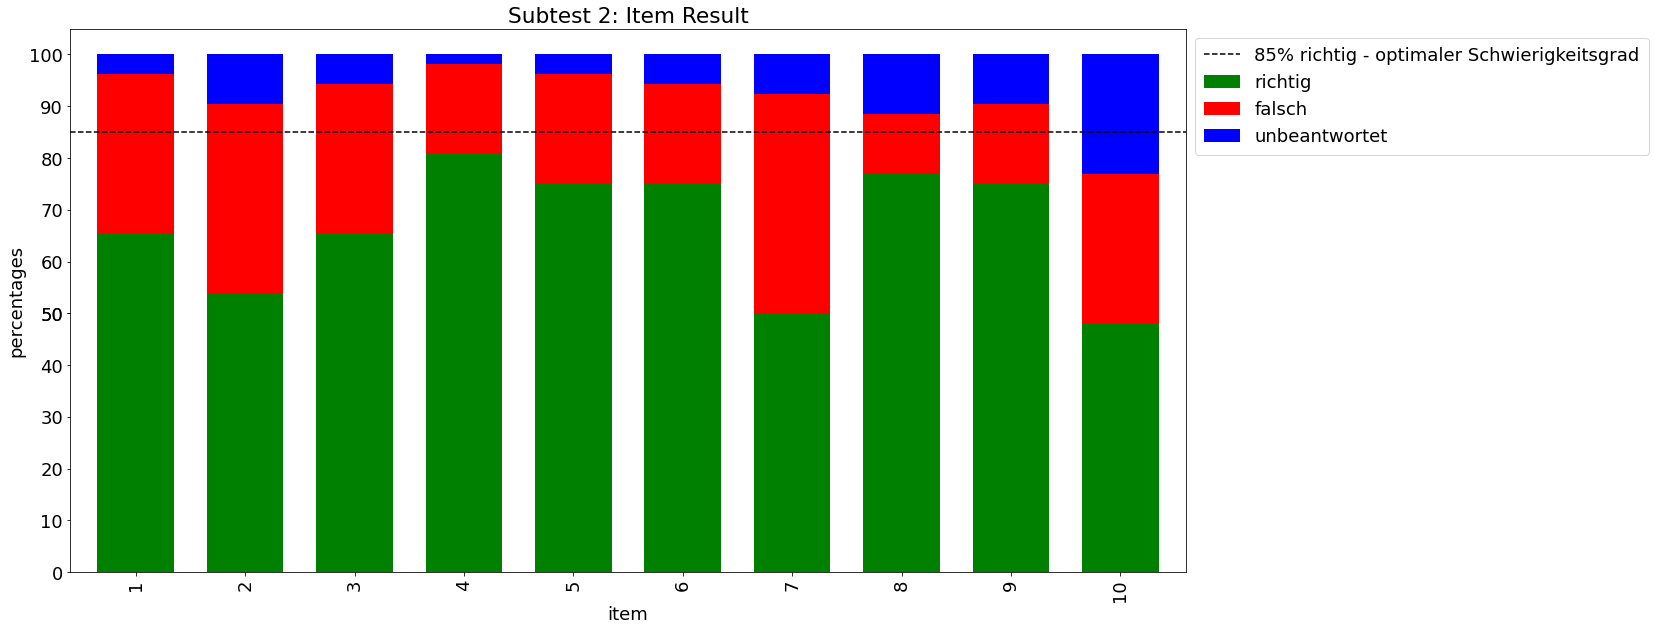

<IPython.core.display.Javascript object>

In [21]:
test2_frequencies_percentages = getFrequencies(test2)[0]

plotFrequencies(
    test2_frequencies_percentages,
    20,
    10,
    "Subtest 2: Item Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

#### Subtest 3: Item results

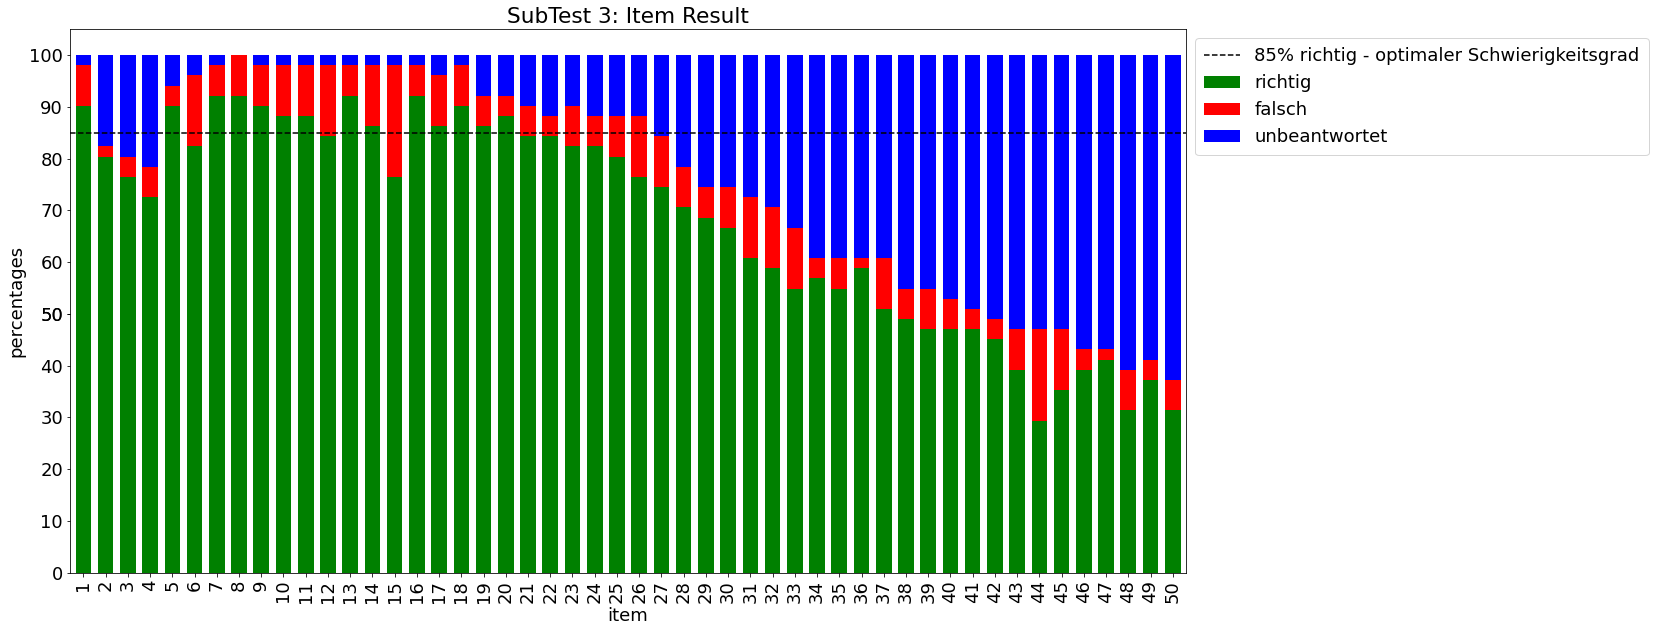

<IPython.core.display.Javascript object>

In [22]:
test3_frequencies_percentages = getFrequencies(test3)[0]

plotFrequencies(
    test3_frequencies_percentages,
    20,
    10,
    "SubTest 3: Item Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

#### Subtest 4 : Item results

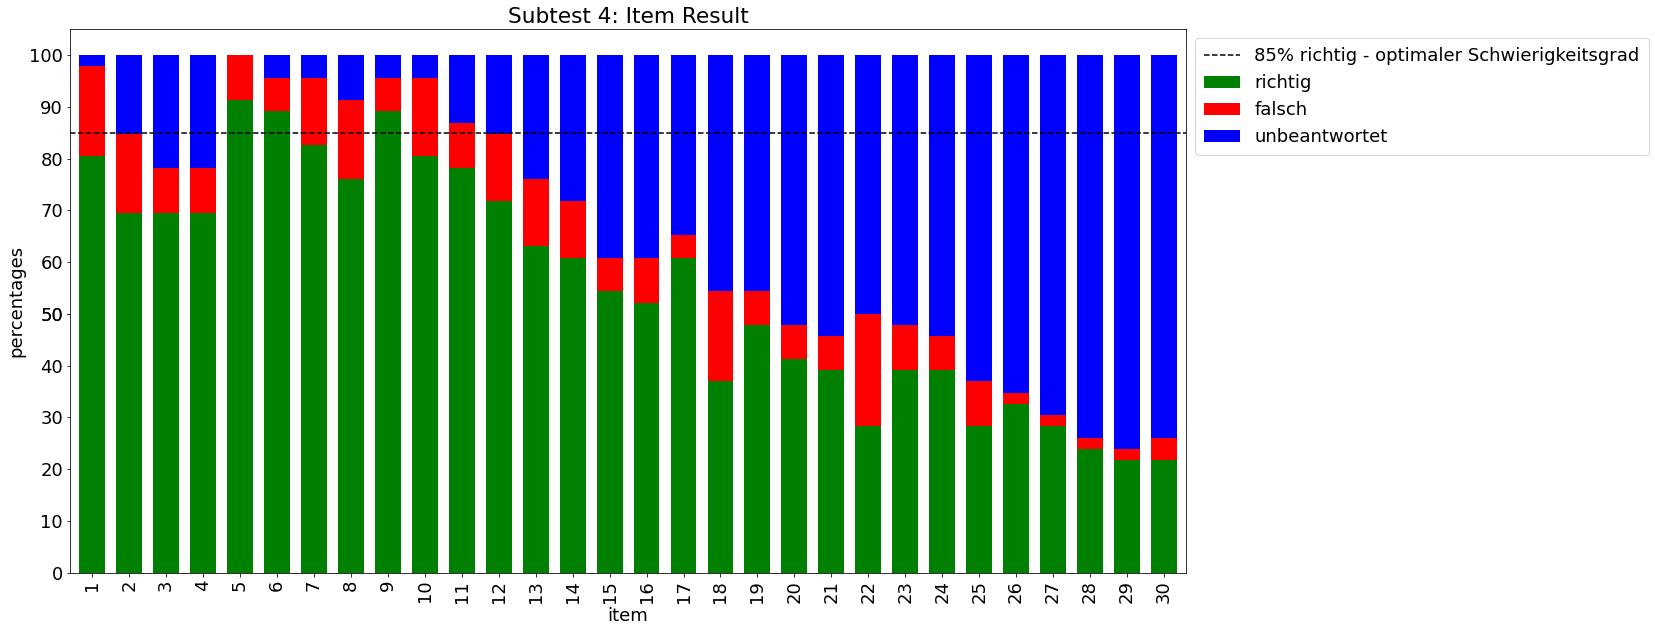

<IPython.core.display.Javascript object>

In [23]:
test4_frequencies_percentages = getFrequencies(test4)[0]

plotFrequencies(
    test4_frequencies_percentages,
    20,
    10,
    "Subtest 4: Item Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

### 5. Correlations
Are there significant correlations (> 0.85) between false answers and no response?

In [24]:
# calculate correlation
def correlation(df, col1, col2, text=""):
    column_1 = df[col1]
    column_2 = df[col2]
    correlation = column_1.corr(column_2)
    print(text, correlation)
    return correlation

<IPython.core.display.Javascript object>

#### Subtest 1

In [25]:
dataToPlot1 = getFrequencies(test1)
dataToPlot1 = dataToPlot1[0]
correlation_1 = correlation(
    dataToPlot1, 0, 99, text="Subtest 1, Correlation false & unanswered: "
)

Subtest 1, Correlation false & unanswered:  -0.16724840200141827


<IPython.core.display.Javascript object>

#### Subtest 2

In [26]:
# Test 2
dataToPlot2 = getFrequencies(test2)
dataToPlot2 = dataToPlot2[0]
correlation_2 = correlation(
    dataToPlot2, 0, 99, text="Subtest 2, Correlation false & unanswered: "
)

Subtest 2, Correlation false & unanswered:  0.09483094592136888


<IPython.core.display.Javascript object>

#### Subtest 3

In [27]:
dataToPlot3 = getFrequencies(test3)
dataToPlot3 = dataToPlot3[0]
correlation_3 = correlation(
    dataToPlot3, 0, 99, text="Subtest 3, Correlation false & unanswered: "
)

Subtest 3, Correlation false & unanswered:  -0.22201116427028048


<IPython.core.display.Javascript object>

#### Subtest 4

In [28]:
dataToPlot4 = getFrequencies(test4)
dataToPlot4 = dataToPlot4[0]
correlation_4 = correlation(
    dataToPlot4, 0, 99, text="Subtest 4, Correlation false & unanswered: "
)

Subtest 4, Correlation false & unanswered:  -0.5491691547746677


<IPython.core.display.Javascript object>

## Class level

### Subtest 1

In [29]:
# class level
grouped = test1.groupby(test1.Stufe)
test1_level_1 = grouped.get_group(1)
test1_level_2 = grouped.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

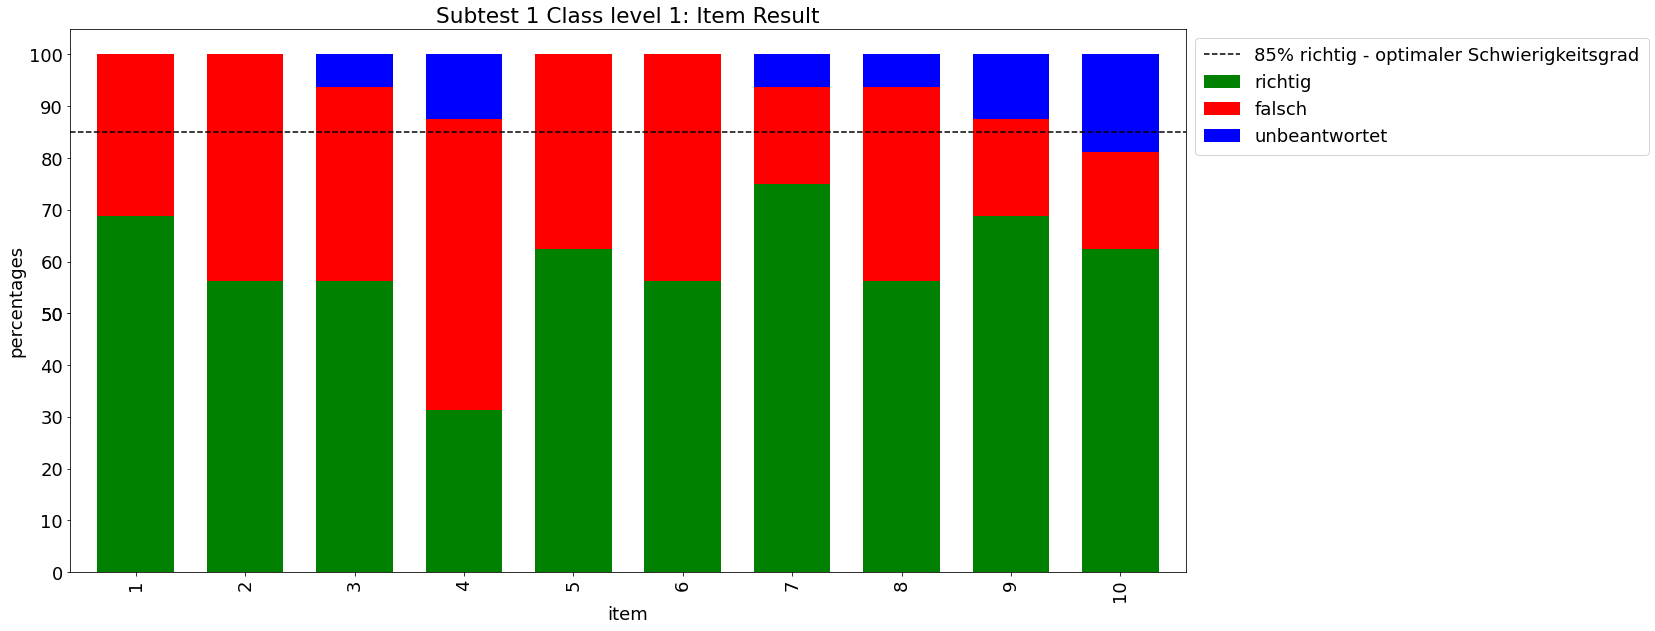

<IPython.core.display.Javascript object>

In [30]:
test1_level_1_frequencies_percentages = getFrequencies(test1_level_1)[0]

plotFrequencies(
    test1_level_1_frequencies_percentages,
    20,
    10,
    "Subtest 1 Class level 1: Item Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

#### Class level 2

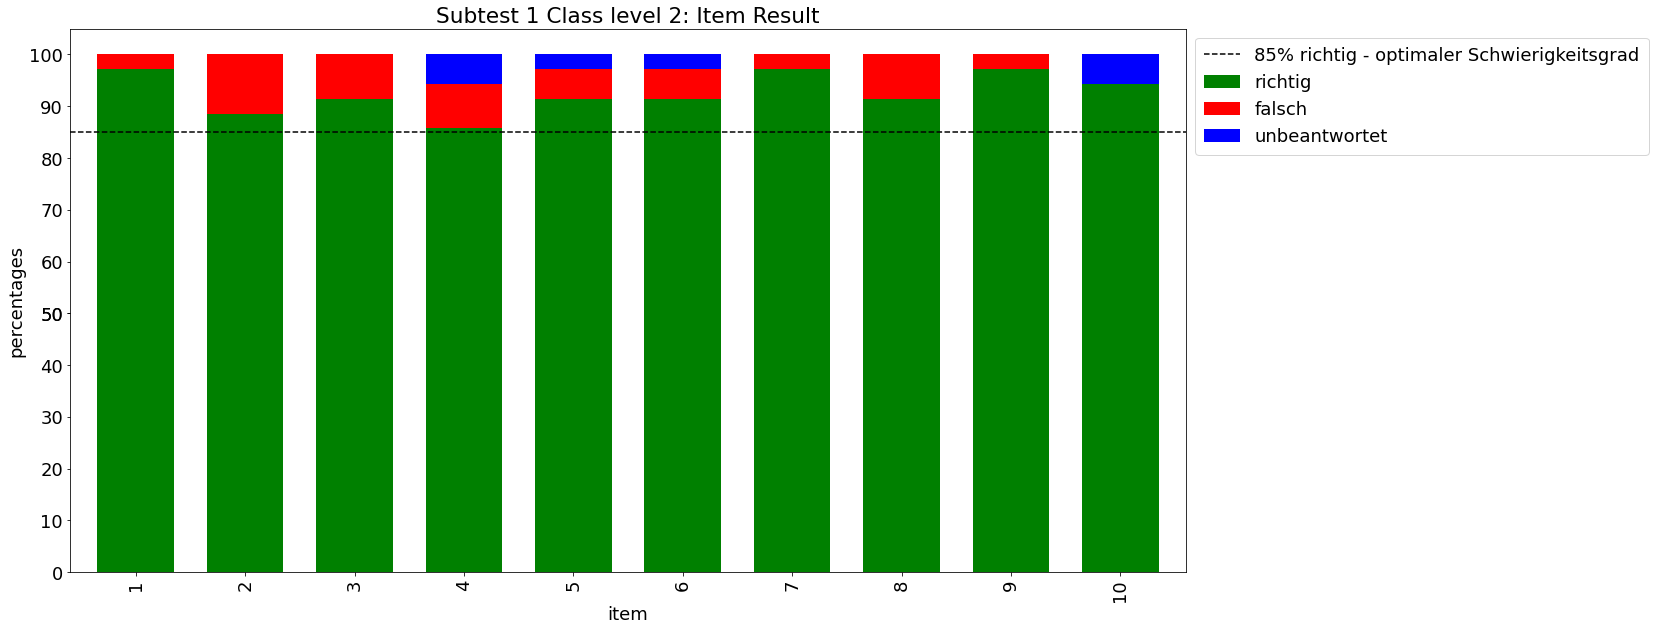

<IPython.core.display.Javascript object>

In [31]:
test1_level_2_frequencies_percentages = getFrequencies(test1_level_2)[0]

plotFrequencies(
    test1_level_2_frequencies_percentages,
    20,
    10,
    "Subtest 1 Class level 2: Item Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

### Subtest 2

In [32]:
# class level
grouped2 = test2.groupby(test2.Stufe)
test2_level_1 = grouped2.get_group(1)
test2_level_2 = grouped2.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

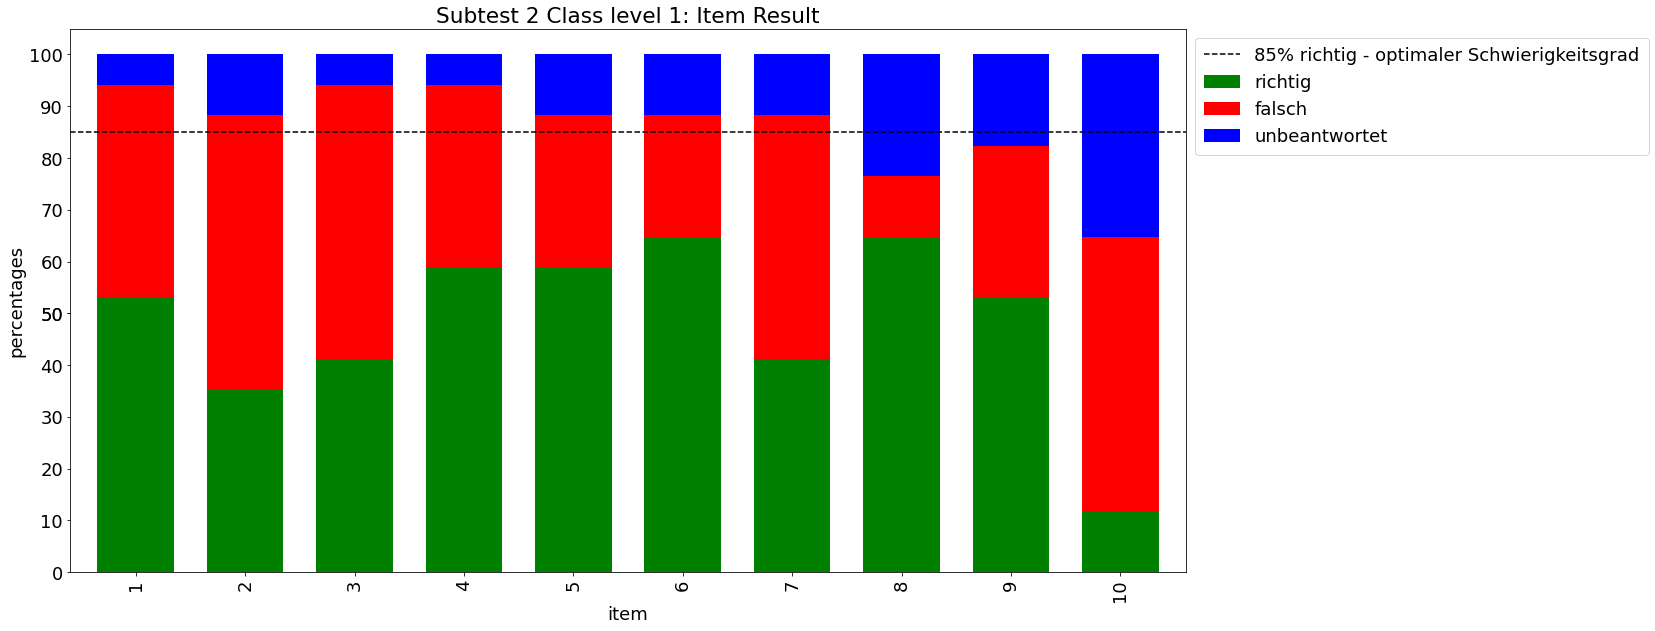

<IPython.core.display.Javascript object>

In [33]:
test2_level_1_frequencies_percentages = getFrequencies(test2_level_1)[0]

plotFrequencies(
    test2_level_1_frequencies_percentages,
    20,
    10,
    "Subtest 2 Class level 1: Item Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

#### Class level 2

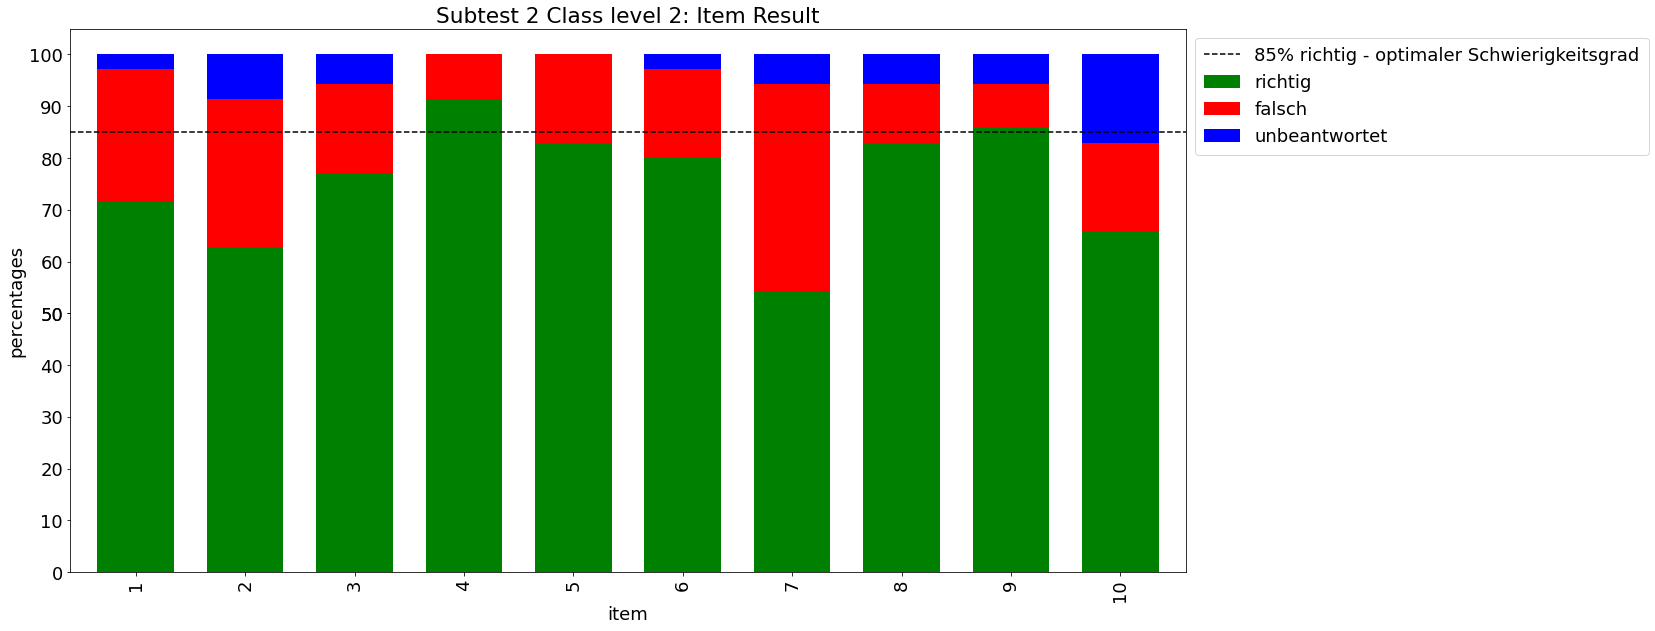

<IPython.core.display.Javascript object>

In [34]:
test2_level_2_frequencies_percentages = getFrequencies(test2_level_2)[0]

plotFrequencies(
    test2_level_2_frequencies_percentages,
    20,
    10,
    "Subtest 2 Class level 2: Item Result",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

### Subtest 3

In [35]:
# class level
grouped3 = test3.groupby(test3.Stufe)
test3_level_1 = grouped3.get_group(1)
test3_level_2 = grouped3.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

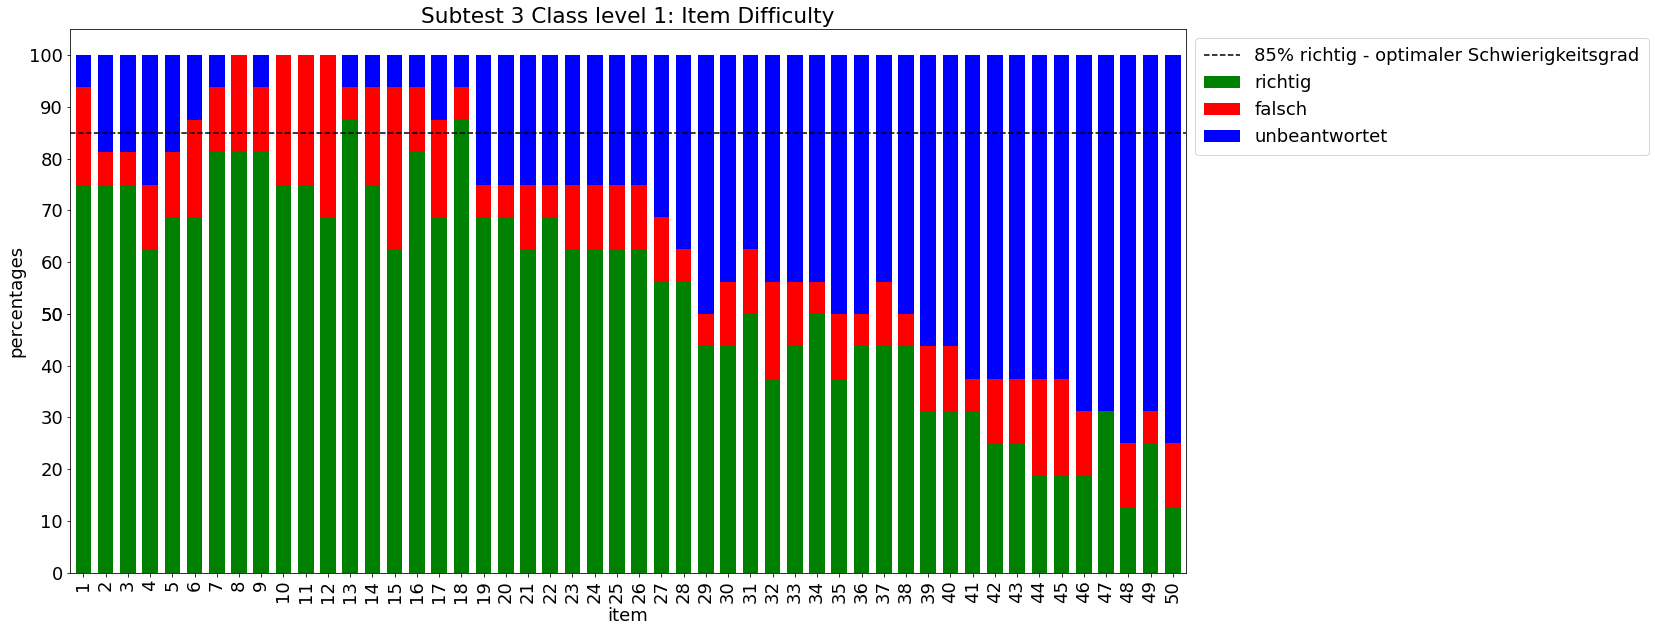

<IPython.core.display.Javascript object>

In [36]:
test3_level_1_frequencies_percentages = getFrequencies(test3_level_1)[0]

plotFrequencies(
    test3_level_1_frequencies_percentages,
    20,
    10,
    "Subtest 3 Class level 1: Item Difficulty",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

#### Class level 2

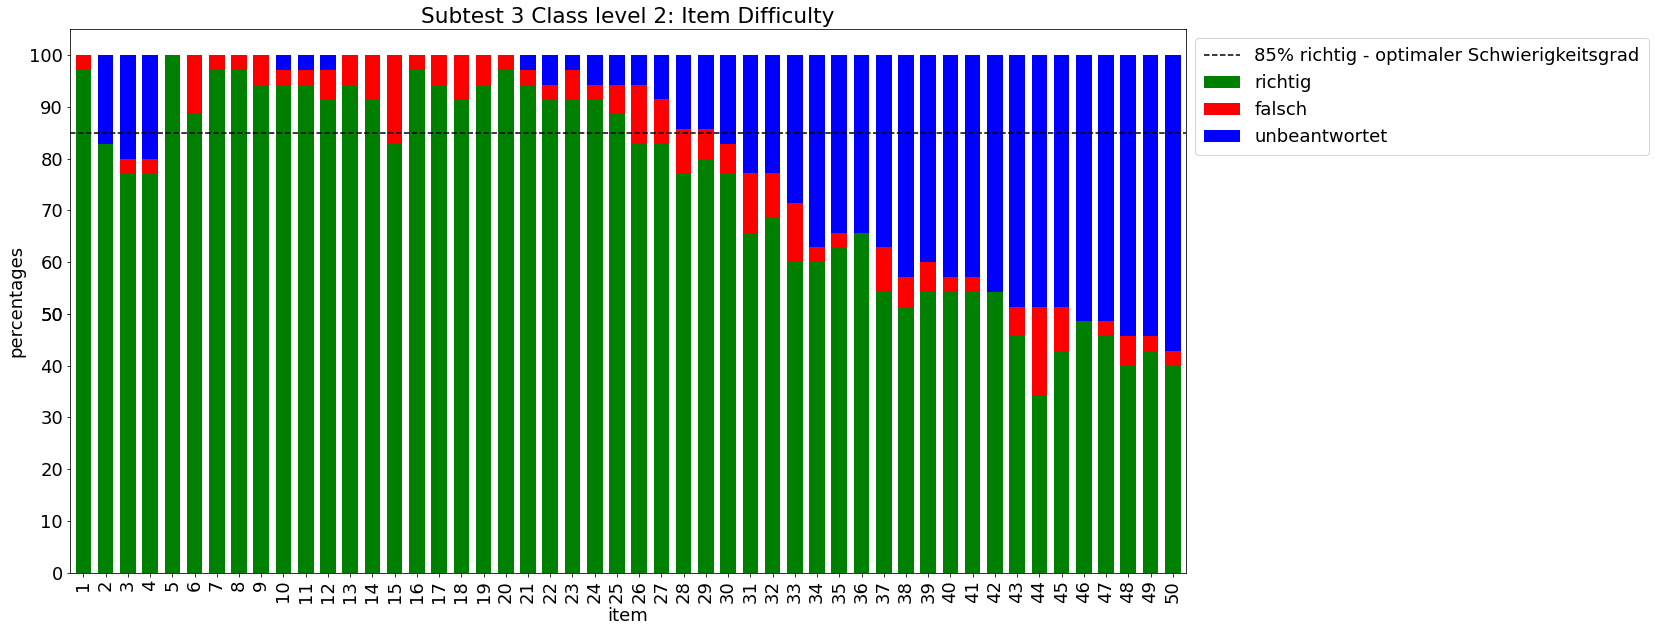

<IPython.core.display.Javascript object>

In [37]:
test3_level_2_frequencies_percentages = getFrequencies(test3_level_2)[0]

plotFrequencies(
    test3_level_2_frequencies_percentages,
    20,
    10,
    "Subtest 3 Class level 2: Item Difficulty",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

### Subtest 4

In [38]:
# class level
grouped4 = test4.groupby(test4.Stufe)
test4_level_1 = grouped4.get_group(1)
test4_level_2 = grouped4.get_group(2)

<IPython.core.display.Javascript object>

#### Class level 1

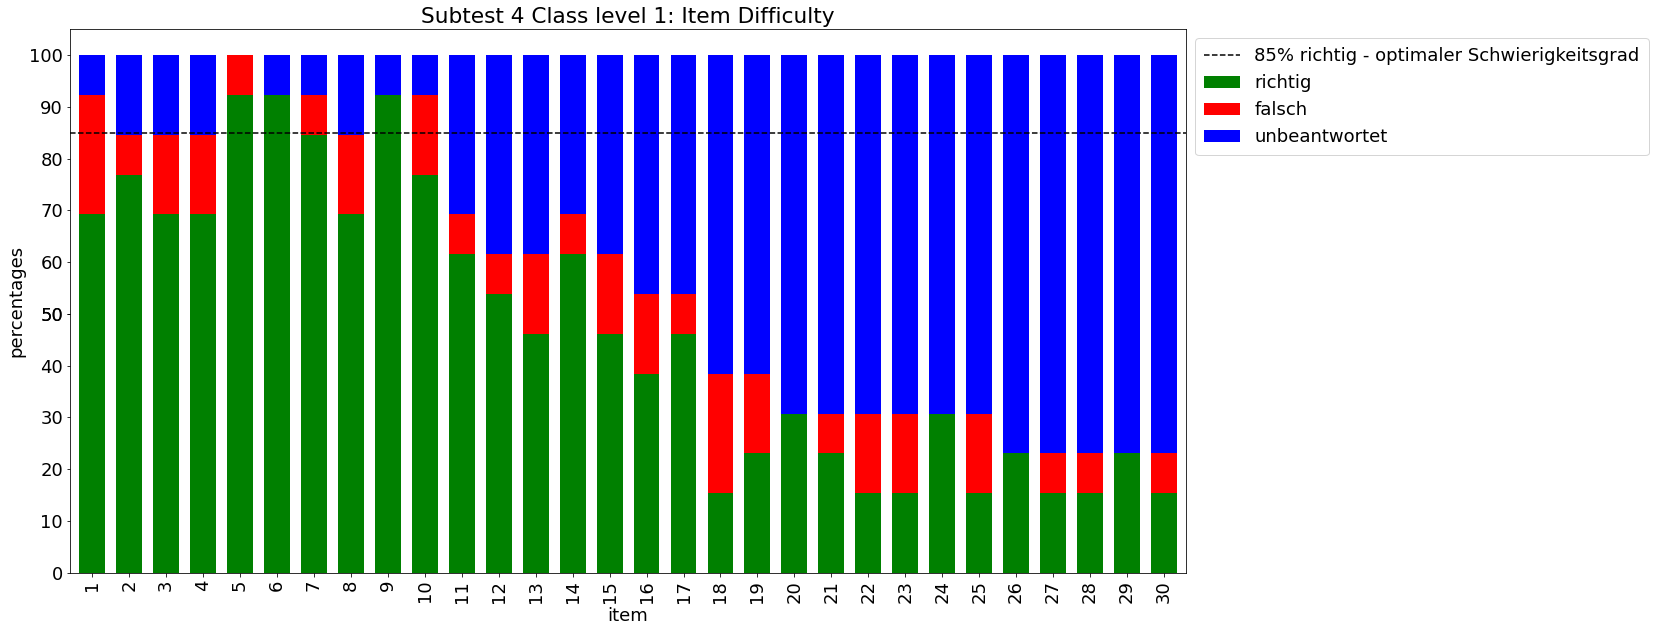

<IPython.core.display.Javascript object>

In [39]:
test4_level_1_frequencies_percentages = getFrequencies(test4_level_1)[0]

plotFrequencies(
    test4_level_1_frequencies_percentages,
    20,
    10,
    "Subtest 4 Class level 1: Item Difficulty",
    legend=legend,
    xlabel="item",
    ylabel="percentages",
    color=colors,
)

#### Class level 2

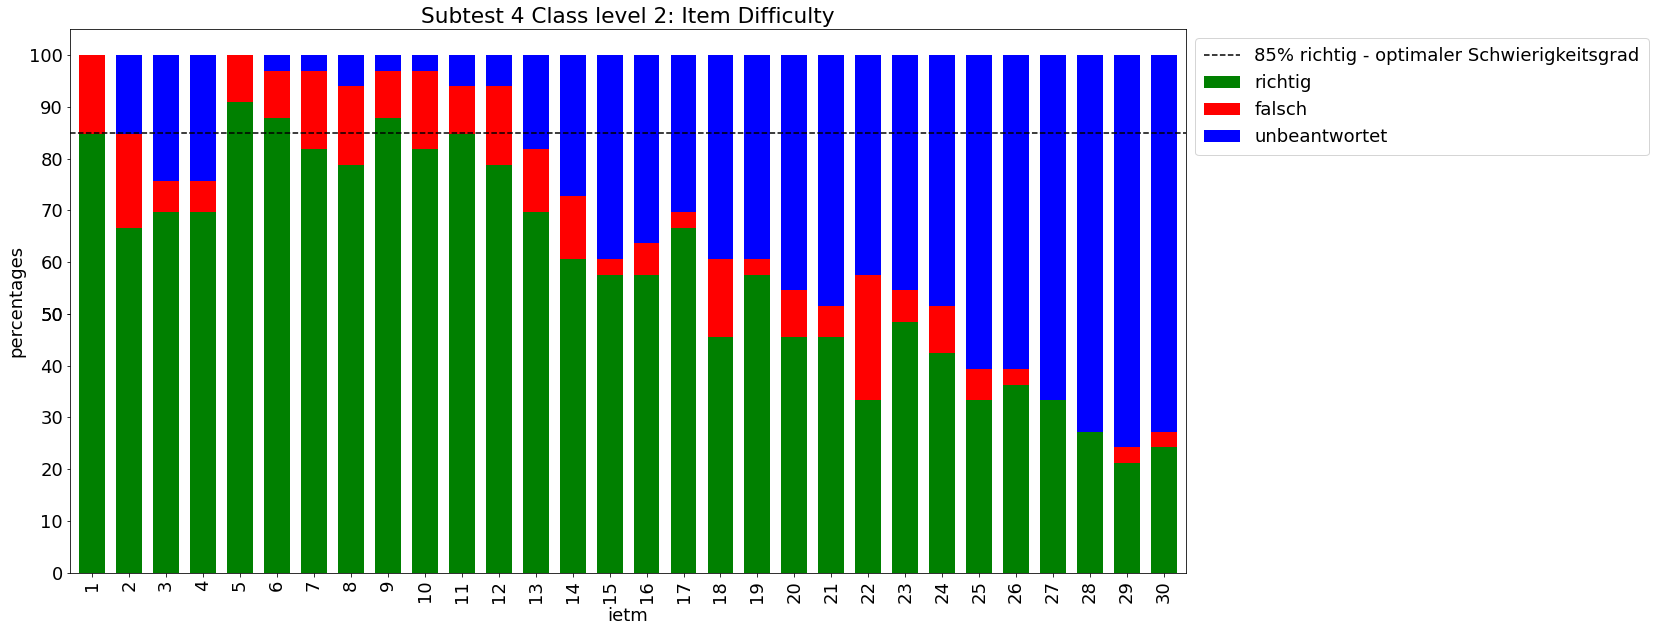

<IPython.core.display.Javascript object>

In [40]:
test4_level_2_frequencies_percentages = getFrequencies(test4_level_2)[0]

plotFrequencies(
    test4_level_2_frequencies_percentages,
    20,
    10,
    "Subtest 4 Class level 2: Item Difficulty",
    legend=legend,
    xlabel="ietm",
    ylabel="percentages",
    color=colors,
)